In [1]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the data
data = pd.read_csv('data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
 12  day               48620 non-null  object 
 13  hour              48620 non-null  int64  
 14  year              48620 non-null  int64  
 15  month             48620 non-null  int64  
dtypes: float64(1), int64(6), object(9)
memor

In [4]:
# display first five rows
data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,hour,year,month
0,1,2015-01-01,2023-08-08 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,11,2015,1
1,77,2015-01-02,2023-08-08 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,12,2015,1
2,146,2015-01-03,2023-08-08 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,14,2015,1
3,163,2015-01-03,2023-08-08 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,16,2015,1
4,247,2015-01-04,2023-08-08 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,20,2015,1


In [5]:
# data.nunique()

In [6]:
# display data types of different all rows 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
 12  day               48620 non-null  object 
 13  hour              48620 non-null  int64  
 14  year              48620 non-null  int64  
 15  month             48620 non-null  int64  
dtypes: float64(1), int64(6), object(9)
memor

## Change the datatype to their correct format

In [7]:
# change category column from object to category
data.category = data.category.astype('category')

In [8]:
# change size from object to category
data['size'] = data['size'].astype('category')

In [9]:
# change column from object to date
data.date = pd.to_datetime(data.date)

In [10]:
# change column time from object to datetime
data.time = pd.to_datetime(data.time)

In [11]:
## sort the data using one column
## data.sort_values(by=["col_name"], inplace = False, ascending = True)

In [12]:
data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,hour,year,month
0,1,2015-01-01,2023-08-08 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,11,2015,1
1,77,2015-01-02,2023-08-08 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,12,2015,1
2,146,2015-01-03,2023-08-08 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,14,2015,1
3,163,2015-01-03,2023-08-08 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,16,2015,1
4,247,2015-01-04,2023-08-08 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,20,2015,1


# Analysis Questions

## Structure of the dataset
> The dataset contains 48620 rows and 17 columns

## What are the main features of interest in the dataset
* Month
* Type of pizza
* Quantity
* size

What size of Pizza sells more

What are the sales of each month

# The functions below can be reused

In [13]:
# a function used to create pieplots    
def PiePlots(xVar,mtitle):
    sorted_counts = xVar.value_counts();
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');
    plt.title(mtitle, fontsize = 15);
    

In [14]:
# a function used to create countplots
def CountPlots(df, xVar):
    base_color = sb.color_palette()[0]
    plt.figure(figsize = [14,8])
    sb.countplot(data = df, x = xVar, edgecolor = 'black', color=base_color);
    plt.title(f'''Distribution of {xVar}'''.title(), fontsize = 14, weight = 'bold')
    plt.xlabel(xVar.title(), fontsize = 10, weight = 'bold')
    plt.ylabel('Frequency'.title(), fontsize = 10, weight = 'bold')

In [15]:
# Total sales
total = data['price'].sum()
print(f"Total sales {total}")

Total sales 801944.7


In [16]:
# Total number of pizzas sold
total = data['quantity'].sum()
print(f"Units solds {total}")

Units solds 49574


In [17]:
# sales per category
data.groupby(["category"])['price'].sum()

category
Chicken    191527.25
Classic    215732.60
Supreme    204486.75
Veggie     190198.10
Name: price, dtype: float64

In [18]:
# sales per size
data.groupby(["size"])['price'].sum()

size
L      366862.1
M      245409.5
S      174794.5
XL      13872.0
XXL      1006.6
Name: price, dtype: float64

In [19]:
# total sales per month
data.groupby(["month"])['price'].sum()

month
1     68472.70
2     64067.40
3     69198.00
4     67286.20
5     69939.35
6     66796.30
7     71027.45
8     67068.80
9     63018.00
10    62566.50
11    69054.00
12    63450.00
Name: price, dtype: float64

## Univariate Exploration
> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [20]:
def CountPlotsWithValues(df, xVar, value_type='count', order=None):
    plt.figure(figsize=[14, 8])
    
    if order is None:
        ax = sns.countplot(data=df, x=xVar, edgecolor='black', color=sns.color_palette()[0])
    else:
        ax = sns.countplot(data=df, x=xVar, edgecolor='black', color=sns.color_palette()[0], order=order)

    plt.title(f'Distribution of {xVar}'.title(), fontsize=14, weight='bold')
    plt.xlabel(xVar.title(), fontsize=10, weight='bold')
    plt.ylabel('Frequency'.title(), fontsize=10, weight='bold')

    total = len(df)
    for p in ax.patches:
        if value_type == 'percentage':
            label = '{:.1f}%'.format((p.get_height() / total) * 100)
        else:
            label = str(p.get_height())
        ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')


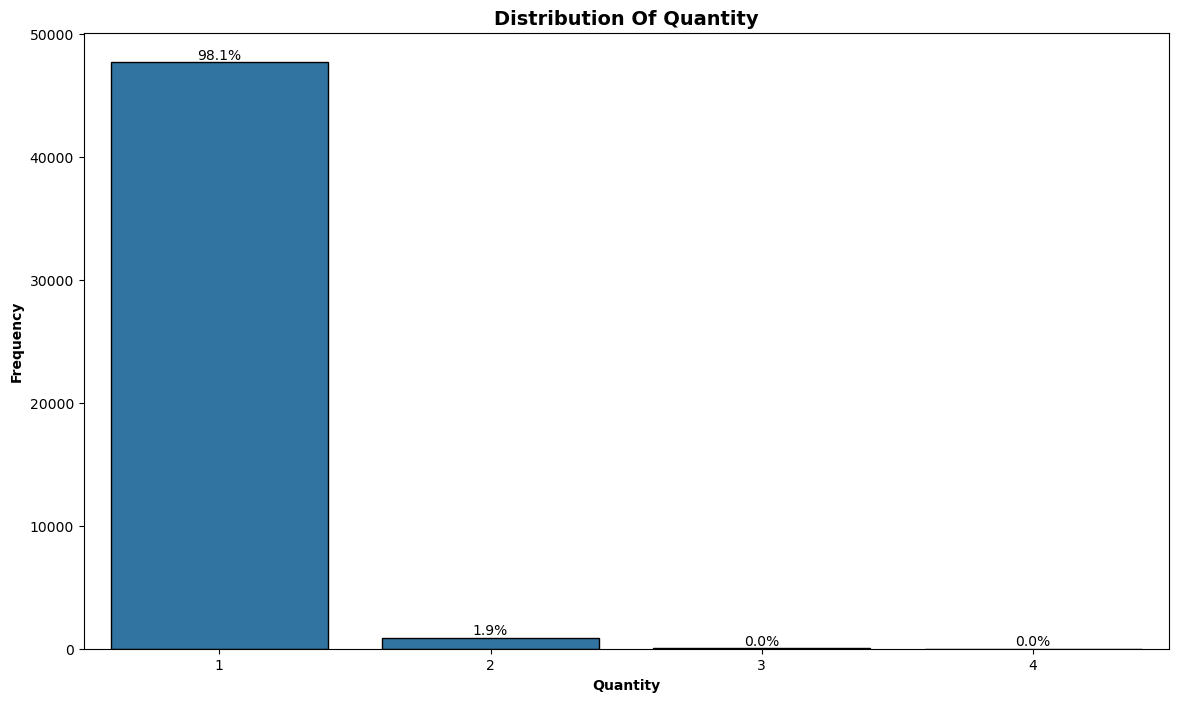

In [21]:
CountPlotsWithValues(data, 'quantity', value_type='percentage')
plt.show()

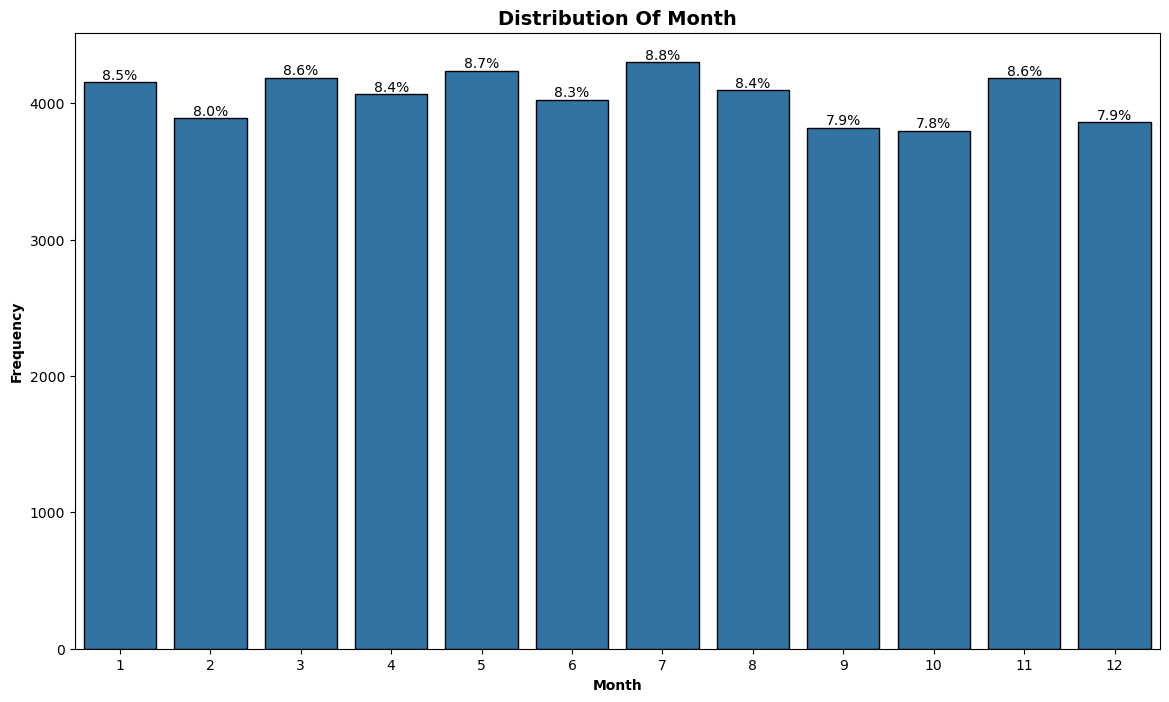

In [22]:
CountPlotsWithValues(data, 'month', value_type='percentage')
plt.show()

## Distribution of oders based on different sizes

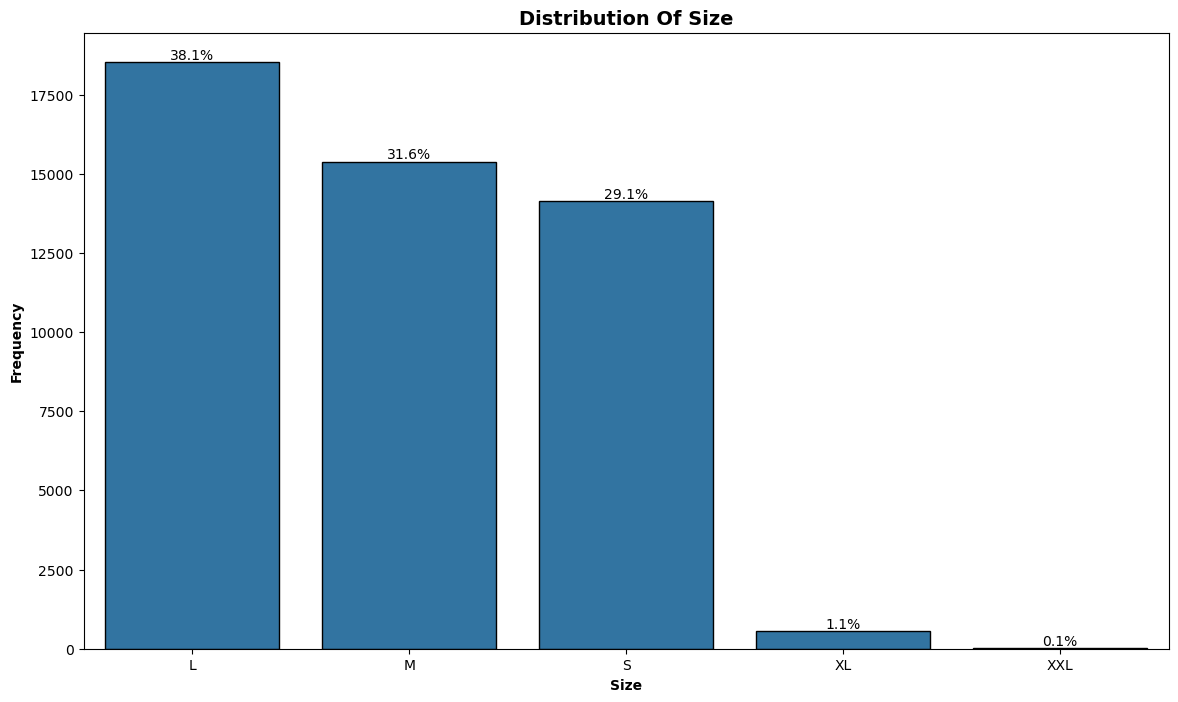

In [23]:
# Example usage
CountPlotsWithValues(data, 'size', value_type='percentage')
plt.show()

### The size of pizza ordered by most customers, Large, followed by Medium then small.

# Question
## Which category of pizza is more popular

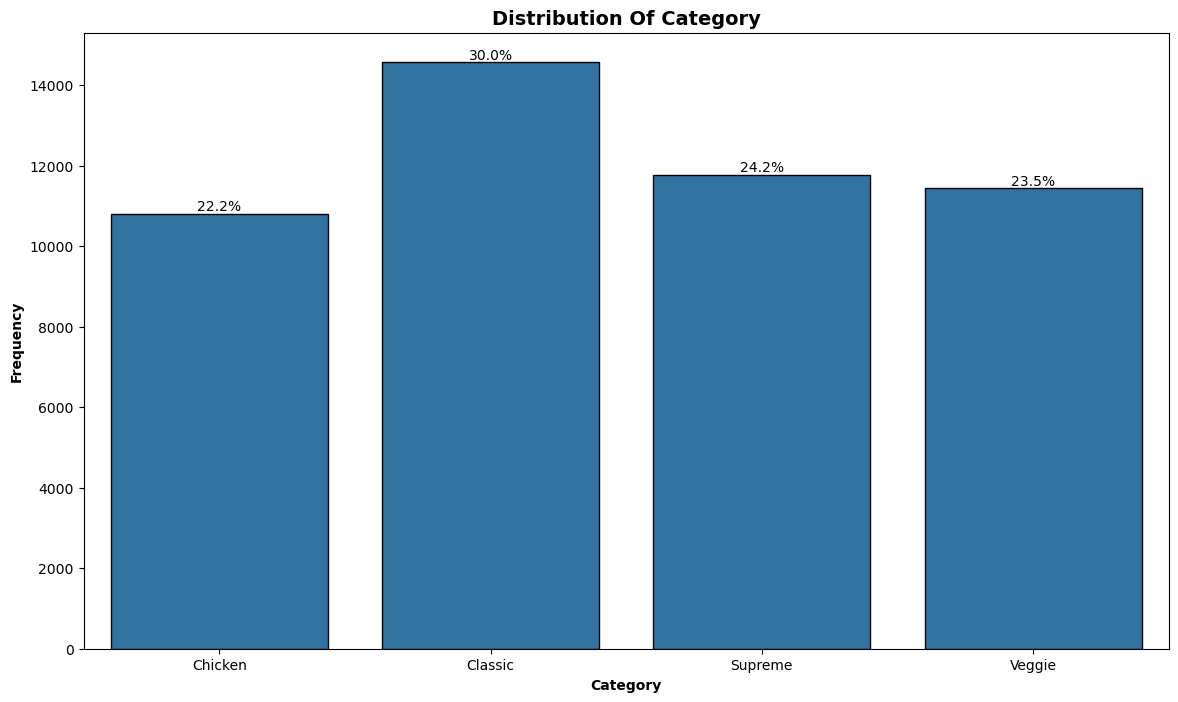

In [24]:
# Example usage
CountPlotsWithValues(data, 'category', value_type='percentage')
plt.show()

### From the figure above it is noted that many customers order classic pizza compared to the other three

## Question

### What are the best hours

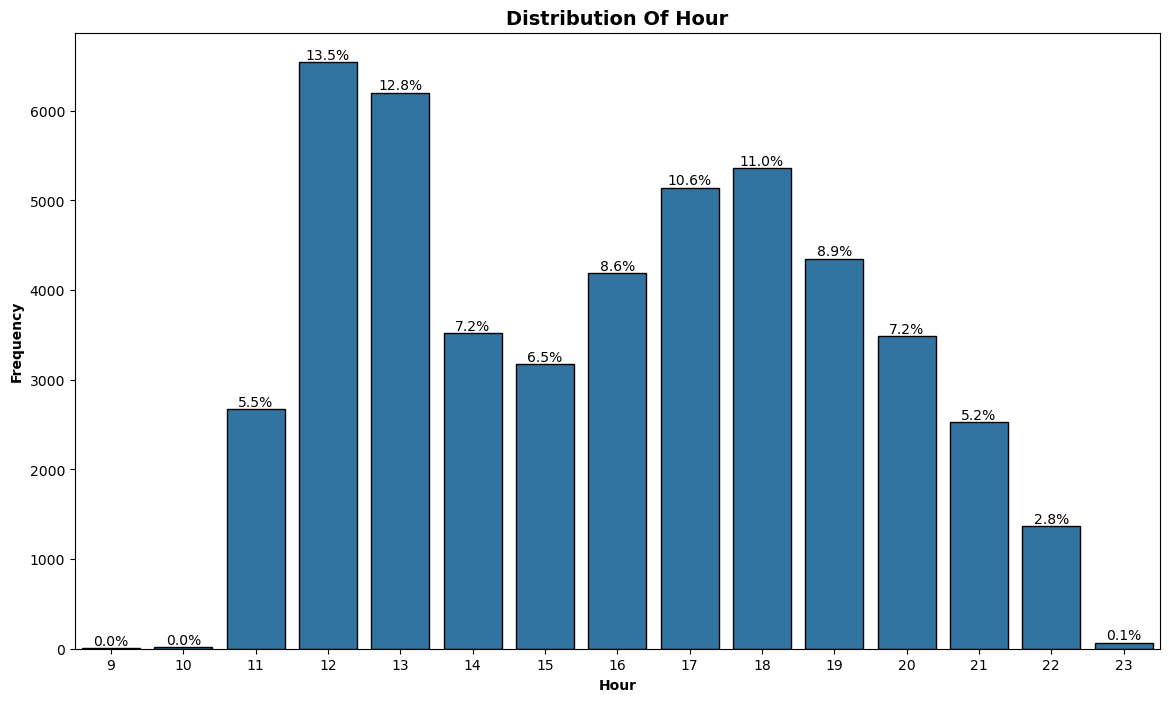

In [25]:
# Example usage
CountPlotsWithValues(data, 'hour', value_type='percentage')
plt.show()

### From the chart above the best hours are 12AM, 1PM, 5PM, 18PM

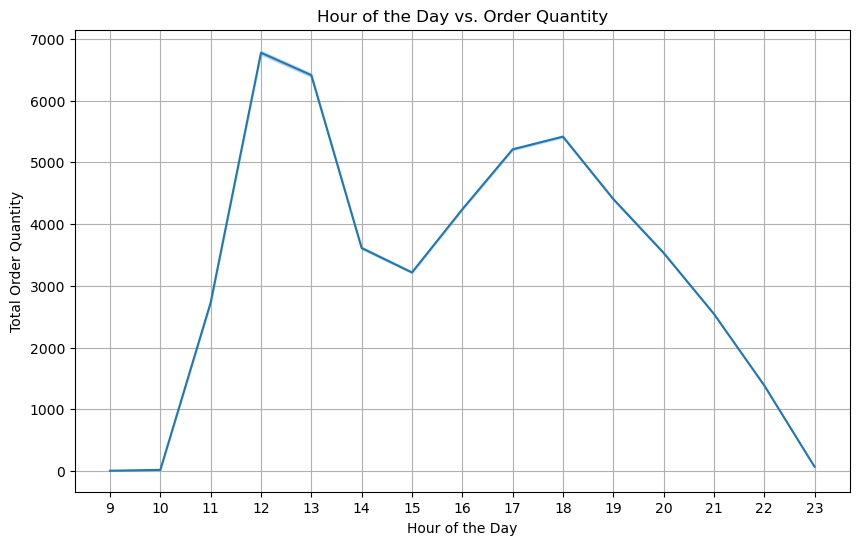

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='hour', y='quantity', estimator=sum)

# Set x-axis values to include all hours from 10 to 22
plt.xticks(range(9, 24))  # This sets tick values from 10 to 22

plt.title('Hour of the Day vs. Order Quantity')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Order Quantity')
plt.grid()
plt.show()

## Bivariate Exploration

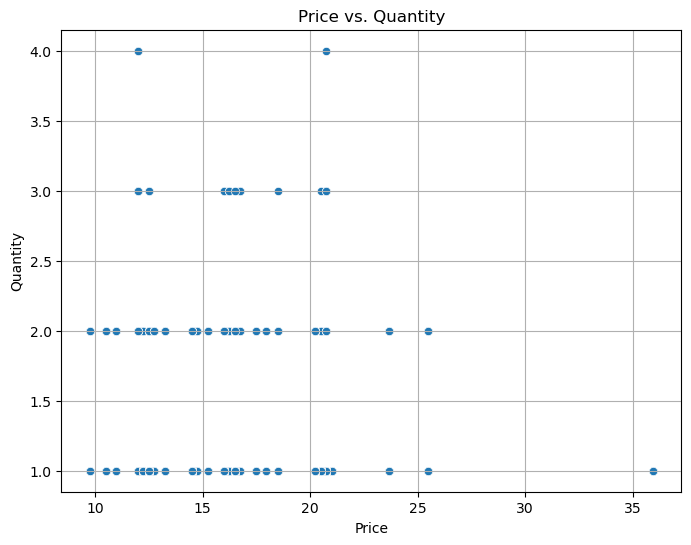

In [27]:
# Bivariate Analysis 1: Price vs. Quantity (Scatter Plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='price', y='quantity')
plt.title('Price vs. Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid()
plt.show()

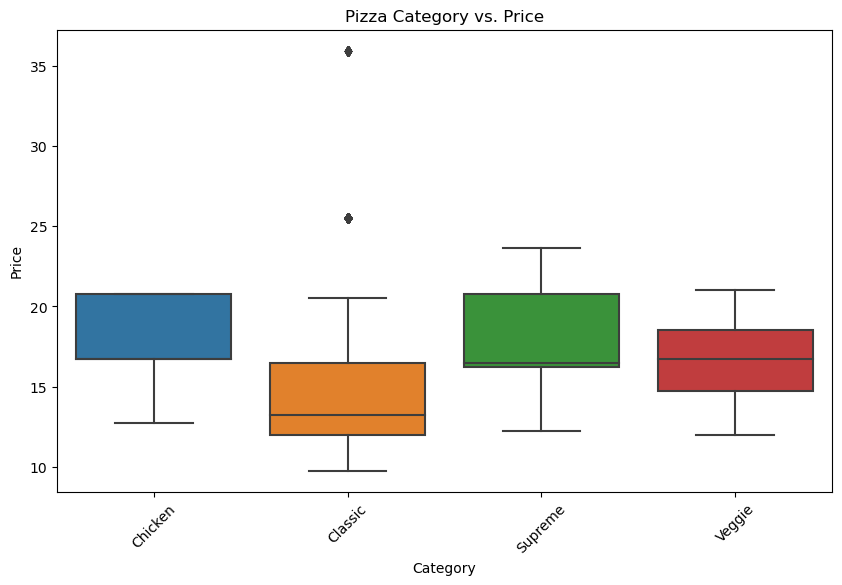

In [28]:
# Bivariate Analysis 2: Pizza Category vs. Price (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='category', y='price')
plt.title('Pizza Category vs. Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

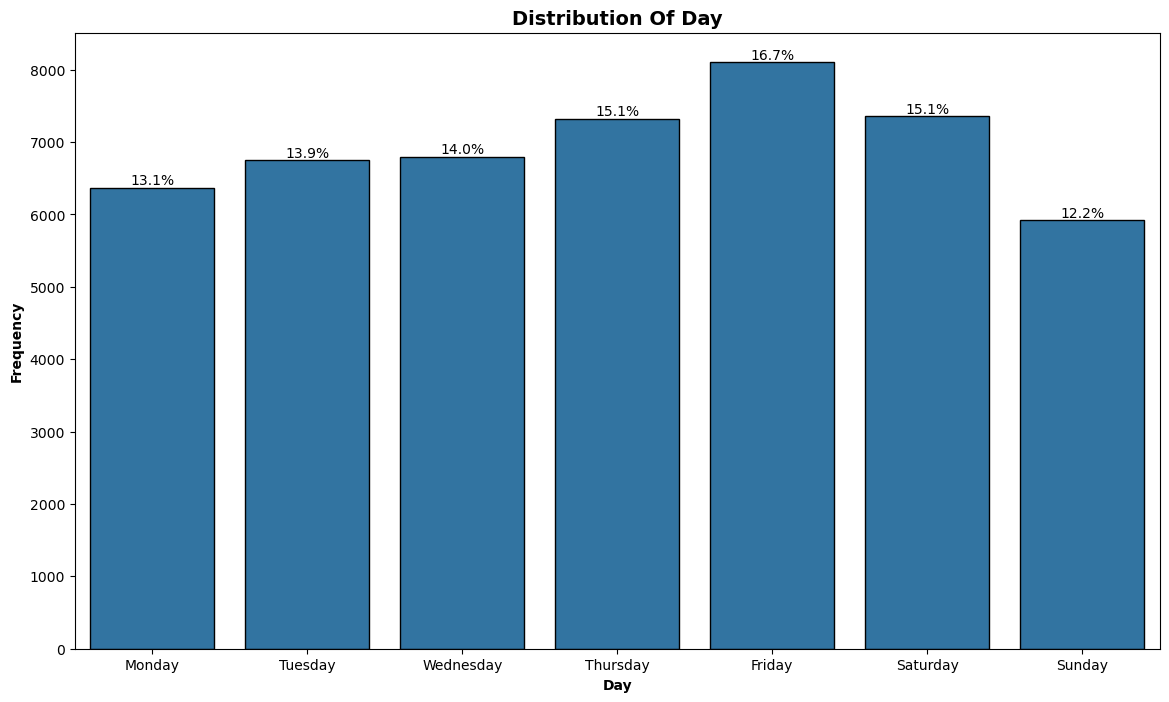

In [29]:
# Define the custom order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Example usage with custom day order
CountPlotsWithValues(data, 'day', value_type='percentage', order=day_order)
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   date              48620 non-null  datetime64[ns]
 2   time              48620 non-null  datetime64[ns]
 3   order_details_id  48620 non-null  int64         
 4   pizza_id          48620 non-null  object        
 5   quantity          48620 non-null  int64         
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  category      
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  category      
 11  ingredients       48620 non-null  object        
 12  day               48620 non-null  object        
 13  hour              48620 non-null  int64         
 14  year              4862

In [40]:
data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,day,hour,year,month
0,1,2015-01-01,2023-08-08 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,11,2015,1
1,77,2015-01-02,2023-08-08 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Friday,12,2015,1
2,146,2015-01-03,2023-08-08 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,14,2015,1
3,163,2015-01-03,2023-08-08 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Saturday,16,2015,1
4,247,2015-01-04,2023-08-08 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Sunday,20,2015,1
